In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Sastrawi
from wordcloud import wordcloud

In [2]:
df = pd.read_csv('dataBaru.csv'); index_col=0
df.head()

,userName,content,score,at,repliedAt,appVersion
0,Pengguna Google,"Kl Bisa potongan admin jgn banyak banyak ya, j...",5,2025-11-03 07:33:50,NaN,4.43.0
1,Pengguna Google,kenapa lama proses kembalian dananya sedang ka...,5,2025-11-03 07:11:07,NaN,4.43.0
2,Pengguna Google,mudah mudahan berkah,5,2025-11-02 23:47:14,NaN,4.43.0
3,Pengguna Google,aplikasi sial saya top up dana sampai sekarang...,1,2025-11-02 21:12:54,NaN,4.43.0
4,Pengguna Google,biyaya transfernya gede banget 6500 geloo,5,2025-11-02 16:55:54,NaN,NaN


In [3]:
df_link = df.copy()

In [4]:
#LABELING
label = []
for index, row in df_link.iterrows():
    if row["score"] == 4 or row["score"] == 5:
        label.append(1)
    else :
        label.append(0)
df_link["label"] = label

In [5]:
df_link.head()

,userName,content,score,at,repliedAt,appVersion,label
0,Pengguna Google,"Kl Bisa potongan admin jgn banyak banyak ya, j...",5,2025-11-03 07:33:50,NaN,4.43.0,1
1,Pengguna Google,kenapa lama proses kembalian dananya sedang ka...,5,2025-11-03 07:11:07,NaN,4.43.0,1
2,Pengguna Google,mudah mudahan berkah,5,2025-11-02 23:47:14,NaN,4.43.0,1
3,Pengguna Google,aplikasi sial saya top up dana sampai sekarang...,1,2025-11-02 21:12:54,NaN,4.43.0,0
4,Pengguna Google,biyaya transfernya gede banget 6500 geloo,5,2025-11-02 16:55:54,NaN,NaN,1


In [6]:
#PreProcessing code
def casefolding(Review):
    # Cek jika nilai bukan NaN atau non-string
    if isinstance(Review, str):
        return Review.lower()  # Hanya terapkan lower() jika Review adalah string
    else:
        return Review  # Jika bukan string (misal NaN atau angka), kembalikan nilai asli

df_link['content'] = df_link['content'].apply(casefolding)
df_link.head()

,userName,content,score,at,repliedAt,appVersion,label
0,Pengguna Google,"kl bisa potongan admin jgn banyak banyak ya, j...",5,2025-11-03 07:33:50,NaN,4.43.0,1
1,Pengguna Google,kenapa lama proses kembalian dananya sedang ka...,5,2025-11-03 07:11:07,NaN,4.43.0,1
2,Pengguna Google,mudah mudahan berkah,5,2025-11-02 23:47:14,NaN,4.43.0,1
3,Pengguna Google,aplikasi sial saya top up dana sampai sekarang...,1,2025-11-02 21:12:54,NaN,4.43.0,0
4,Pengguna Google,biyaya transfernya gede banget 6500 geloo,5,2025-11-02 16:55:54,NaN,NaN,1


In [7]:
df_link = df_link.dropna(subset=['content'])

df_link.head()

,userName,content,score,at,repliedAt,appVersion,label
0,Pengguna Google,"kl bisa potongan admin jgn banyak banyak ya, j...",5,2025-11-03 07:33:50,NaN,4.43.0,1
1,Pengguna Google,kenapa lama proses kembalian dananya sedang ka...,5,2025-11-03 07:11:07,NaN,4.43.0,1
2,Pengguna Google,mudah mudahan berkah,5,2025-11-02 23:47:14,NaN,4.43.0,1
3,Pengguna Google,aplikasi sial saya top up dana sampai sekarang...,1,2025-11-02 21:12:54,NaN,4.43.0,0
4,Pengguna Google,biyaya transfernya gede banget 6500 geloo,5,2025-11-02 16:55:54,NaN,NaN,1


In [9]:
norm = {
    " dgn " : " dengan ",
    " gue " : " saya ",
    " dgn " : " dengan ",
    " bgmn " : " bagaimana ",
    " tdk" : " tidak ",
    " blm" : " belum ",
    " mantull" : " bagus ",
    " josss" : " bagus ",
    " thanks " : " terima kasih ",
    " fast" : " cepat ",
    " dg " : " dengan ",
    " trims" : " terima kasih ",
    " brg" : " barang ",
    " gx" : " tidak ",
    " recommended" : " rekomen ",
    " recomend" : " rekomen ",
    " good" : " bagus ",
    " sial" : " sangat buruk ",
    " geloo" : " gila ",
    " bnyk" : " banyak ",
    " knp" : " kenapa ",
    " mantull" : " bagus ",
    " bs" : " bisa ",
    " gk" : " tidak ",
    " gw" : " saya ",
    " brg" : " barang ",
    " lelet" : " lambat ",
    " ngefek" : " berpengaruh ",
    " asli" : " benar-benar ",
    " sabar" : " bersabar ",
    " lg" : " lagi ",
    " gmana" : " gimana ",
    " ok" : " baik ",
    " mantap" : " bagus ",
    "knp" : "kenapa",
    "sy" : "saya",
    "nggk" : "tidak",
    "nggak" : "tidak",
    "kl" : "kalau"
}

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

df_link['content'] = df_link['content'].apply(lambda x: normalisasi(x))
df_link.head()


,userName,content,score,at,repliedAt,appVersion,label
0,Pengguna Google,kalau bisa potongan admin jgn banyak banyak ya...,5,2025-11-03 07:33:50,NaN,4.43.0,1
1,Pengguna Google,kenapa lama proses kembalian dananya sedang ka...,5,2025-11-03 07:11:07,NaN,4.43.0,1
2,Pengguna Google,mudah mudahan berkah,5,2025-11-02 23:47:14,NaN,4.43.0,1
3,Pengguna Google,aplikasi sangat buruk saya top up dana sampai...,1,2025-11-02 21:12:54,NaN,4.43.0,0
4,Pengguna Google,biyaya transfernya gede banget 6500 gila,5,2025-11-02 16:55:54,NaN,NaN,1


In [10]:
#stopwording
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df_link['content'] = df_link['content'].apply(lambda x: stopword(x))
df_link.head()

,userName,content,score,at,repliedAt,appVersion,label
0,Pengguna Google,"kalau potongan admin jgn banyak banyak ya, tra...",5,2025-11-03 07:33:50,NaN,4.43.0,1
1,Pengguna Google,lama proses kembalian dananya sedang kan link ...,5,2025-11-03 07:11:07,NaN,4.43.0,1
2,Pengguna Google,mudah mudahan berkah,5,2025-11-02 23:47:14,NaN,4.43.0,1
3,Pengguna Google,aplikasi sangat buruk top up dana sekarang ma...,1,2025-11-02 21:12:54,NaN,4.43.0,0
4,Pengguna Google,biyaya transfernya gede banget 6500 gila,5,2025-11-02 16:55:54,NaN,NaN,1


In [11]:
tokenized = df_link ['content'].apply(lambda x:x.split())
tokenized

0       [kalau, potongan, admin, jgn, banyak, banyak, ...
1       [lama, proses, kembalian, dananya, sedang, kan...
2                                [mudah, mudahan, berkah]
3       [aplikasi, sangat, buruk, top, up, dana, sekar...
4         [biyaya, transfernya, gede, banget, 6500, gila]
                              ...                        
9995    [tlp, cs, guna,, chat, live, y, tidak, berguna...
9996                   [sangat, sulit, menghubungi, cs..]
9997    [terpercaya,, mudah, aman, banget, melakukan, ...
9998    [aplikasi, ga, guna,aplikasi, nipu, pengguna, ...
9999                              [memudahkan, aktifitas]
Name: content, Length: 10000, dtype: object

In [12]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(content):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in content:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv('databersih2.csv', index=False)
data_clean = pd.read_csv('databersih2.csv', encoding='latin1')
data_clean.head()

kalau potong admin jgn banyak banyak ya transfer bca makasih lalu aplikasi kok hilang dash board hp gimana cara muncul kembali makasih
lama proses kembali dana sedang kan link aja saldo kurang no rekening tuju masuk mohon cepat lah
mudah mudah berkah
aplikasi sangat buruk top up dana sekarang masuk kembali uang
biyaya transfer gede banget 6500 gila
mending pake dana banyak eror lot 
saya buat data saya tolng d jawab
transaksi dari kemaren masuk kata suruh nungu 1 x 24 jam masih bom masuk sampe jarang gimaba y
keren
vertifikasi nya email bukan ke no handphone 
link aja aplkikasi yg sangat bantu mudah transaksi
mau aju keluh customer service aja susah bnget masa bagai guna beri buat keti soal keluh harus milih yg sdh diapknya coba tambahin menu lain buat guna bisa sampai apa yg kurang
bagus bagus
proses update full service nya lama proses
oke
cara dapat pinjam
apk scem saldo hilang curi
tgl 28 baik tober 2025 beli pulsa internasional singapore 11 tera sukses saldo potong ini pulsa sebut 

,content
0,kalau potong admin jgn banyak banyak ya transf...
1,lama proses kembali dana sedang kan link aja s...
2,mudah mudah berkah
3,aplikasi sangat buruk top up dana sekarang mas...
4,biyaya transfer gede banget 6500 gila


In [16]:
at1 = pd.read_csv('databersih2.csv')
at2 = df_link
att2 = at2['label']

result = pd.concat([at1, att2], axis=1)
     

result.head()

,content,label
0,kalau potong admin jgn banyak banyak ya transf...,1
1,lama proses kembali dana sedang kan link aja s...,1
2,mudah mudah berkah,1
3,aplikasi sangat buruk top up dana sekarang mas...,0
4,biyaya transfer gede banget 6500 gila,1


In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [19]:
content = result['content']

In [20]:
content.isnull().sum()

np.int64(296)

In [21]:
content = content.fillna('tidak ada komentar')

In [22]:
cv = CountVectorizer()
term_fit = cv.fit(content)

print(len(term_fit.vocabulary_))

7780


In [23]:
term_fit.vocabulary_

{'kalau': 3327,
 'potong': 5649,
 'admin': 426,
 'jgn': 3211,
 'banyak': 1018,
 'ya': 7716,
 'transfer': 7241,
 'bca': 1079,
 'makasih': 4219,
 'lalu': 3887,
 'aplikasi': 750,
 'kok': 3668,
 'hilang': 2870,
 'dash': 1830,
 'board': 1348,
 'hp': 2903,
 'gimana': 2652,
 'cara': 1566,
 'muncul': 4700,
 'kembali': 3513,
 'lama': 3889,
 'proses': 5723,
 'dana': 1801,
 'sedang': 6251,
 'kan': 3374,
 'link': 4049,
 'aja': 476,
 'saldo': 6081,
 'kurang': 3830,
 'no': 4999,
 'rekening': 5889,
 'tuju': 7328,
 'masuk': 4348,
 'mohon': 4630,
 'cepat': 1602,
 'lah': 3870,
 'mudah': 4679,
 'berkah': 1163,
 'sangat': 6131,
 'buruk': 1496,
 'top': 7199,
 'up': 7457,
 'sekarang': 6285,
 'uang': 7375,
 'biyaya': 1287,
 'gede': 2596,
 'banget': 973,
 '6500': 322,
 'gila': 2638,
 'mending': 4435,
 'pake': 5264,
 'eror': 2314,
 'lot': 4139,
 'saya': 6163,
 'buat': 1455,
 'data': 1832,
 'tolng': 7172,
 'jawab': 3152,
 'transaksi': 7238,
 'dari': 1820,
 'kemaren': 3508,
 'kata': 3412,
 'suruh': 6747,
 'nungu

In [24]:
# Kolom pertama ini berarti jumlah dokumen
# Kolom kedua berarti letak kata nya
# Kolom ketiga berarti hasil dari tf

term_frequency_all = term_fit.transform(content)
print(term_frequency_all)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 114785 stored elements and shape (10000, 7780)>
  Coords	Values
  (0, 426)	1
  (0, 750)	1
  (0, 1018)	2
  (0, 1079)	1
  (0, 1348)	1
  (0, 1566)	1
  (0, 1830)	1
  (0, 2652)	1
  (0, 2870)	1
  (0, 2903)	1
  (0, 3211)	1
  (0, 3327)	1
  (0, 3513)	1
  (0, 3668)	1
  (0, 3887)	1
  (0, 4219)	2
  (0, 4700)	1
  (0, 5649)	1
  (0, 7241)	1
  (0, 7716)	1
  (1, 476)	1
  (1, 1602)	1
  (1, 1801)	1
  (1, 3374)	1
  (1, 3513)	1
  :	:
  (9997, 1907)	1
  (9997, 2011)	2
  (9997, 2477)	4
  (9997, 2734)	2
  (9997, 3067)	1
  (9997, 3131)	1
  (9997, 3791)	1
  (9997, 4081)	1
  (9997, 4435)	1
  (9997, 4976)	1
  (9997, 5264)	1
  (9997, 6029)	1
  (9997, 6081)	2
  (9997, 6602)	1
  (9997, 6768)	1
  (9997, 6797)	1
  (9997, 6878)	1
  (9997, 7212)	1
  (9997, 7237)	1
  (9997, 7746)	1
  (9998, 519)	1
  (9998, 4679)	1
  (9999, 410)	1
  (9999, 3680)	1
  (9999, 7067)	1


In [25]:
content_tf = content[1]
print(content_tf)

lama proses kembali dana sedang kan link aja saldo kurang no rekening tuju masuk mohon cepat lah


In [26]:
term_frequency = term_fit.transform([content_tf])
print(term_frequency)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 17 stored elements and shape (1, 7780)>
  Coords	Values
  (0, 476)	1
  (0, 1602)	1
  (0, 1801)	1
  (0, 3374)	1
  (0, 3513)	1
  (0, 3830)	1
  (0, 3870)	1
  (0, 3889)	1
  (0, 4049)	1
  (0, 4348)	1
  (0, 4630)	1
  (0, 4999)	1
  (0, 5723)	1
  (0, 5889)	1
  (0, 6081)	1
  (0, 6251)	1
  (0, 7328)	1


In [27]:
dokumen = term_fit.transform(content)
tfidf_transformer = TfidfTransformer().fit(dokumen)
print(tfidf_transformer.idf_)

tfidf = tfidf_transformer.transform(term_frequency)
print(tfidf)

[7.32006861 5.60527018 9.11182808 ... 8.82414601 9.51729319 9.51729319]
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 17 stored elements and shape (1, 7780)>
  Coords	Values
  (0, 476)	0.15347015645079504
  (0, 1602)	0.2628985281513544
  (0, 1801)	0.22741853310872392
  (0, 3374)	0.2907132367429439
  (0, 3513)	0.24024606882104982
  (0, 3830)	0.2439542265277335
  (0, 3870)	0.27483623883904806
  (0, 3889)	0.17625988172075793
  (0, 4049)	0.17287412427555776
  (0, 4348)	0.1586941539775766
  (0, 4630)	0.24281438600795108
  (0, 4999)	0.26838099149272626
  (0, 5723)	0.2192191779669452
  (0, 5889)	0.30143843245610563
  (0, 6081)	0.14408280056690084
  (0, 6251)	0.32272315475105984
  (0, 7328)	0.31204937568965246


In [28]:
train_s0 = df_link[df_link["label"] == 0]

In [29]:
train_s0["content"] = train_s0["content"].fillna("tidak ada komentar")

C:\Users\ACER\AppData\Local\Temp\ipykernel_26820\2446275887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["content"] = train_s0["content"].fillna("tidak ada komentar")


In [30]:
train_s0.head()

,userName,content,score,at,repliedAt,appVersion,label
3,Pengguna Google,aplikasi sangat buruk top up dana sekarang ma...,1,2025-11-02 21:12:54,NaN,4.43.0,0
5,Pengguna Google,"mending pake dana.. banyak eror, lemot, 👎",1,2025-11-02 16:46:23,NaN,4.43.0,0
6,Pengguna Google,saya buat data saya. tolng d jawab,1,2025-11-02 11:10:58,NaN,4.43.0,0
7,Pengguna Google,"transaksi dari kemaren masuk"" katanya suruh nu...",2,2025-11-02 10:28:01,NaN,4.43.0,0
9,Pengguna Google,"vertifikasi nya email, bukan ke no handphone?? ⭐",2,2025-11-02 06:38:32,NaN,4.43.0,0


In [31]:
from wordcloud import WordCloud

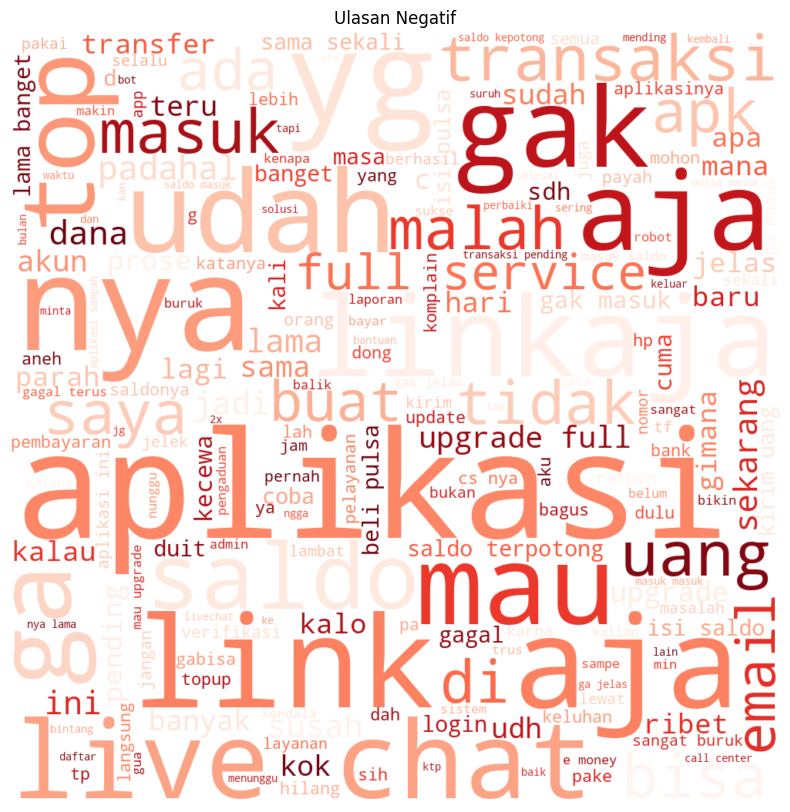

In [32]:
all_text_s0 = ' '.join(word for word in train_s0["content"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ulasan Negatif")
plt.margins(x=0, y=0)
plt.show()

In [33]:
train_s1 = df_link[df_link["label"] == 1]

In [34]:
train_s1["content"] = train_s1["content"].fillna("Tidak ada komentar")

C:\Users\ACER\AppData\Local\Temp\ipykernel_26820\2441158359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["content"] = train_s1["content"].fillna("Tidak ada komentar")


In [35]:
train_s1.head()

,userName,content,score,at,repliedAt,appVersion,label
0,Pengguna Google,"kalau potongan admin jgn banyak banyak ya, tra...",5,2025-11-03 07:33:50,NaN,4.43.0,1
1,Pengguna Google,lama proses kembalian dananya sedang kan link ...,5,2025-11-03 07:11:07,NaN,4.43.0,1
2,Pengguna Google,mudah mudahan berkah,5,2025-11-02 23:47:14,NaN,4.43.0,1
4,Pengguna Google,biyaya transfernya gede banget 6500 gila,5,2025-11-02 16:55:54,NaN,NaN,1
8,Pengguna Google,keren,5,2025-11-02 07:45:57,NaN,4.42.0,1


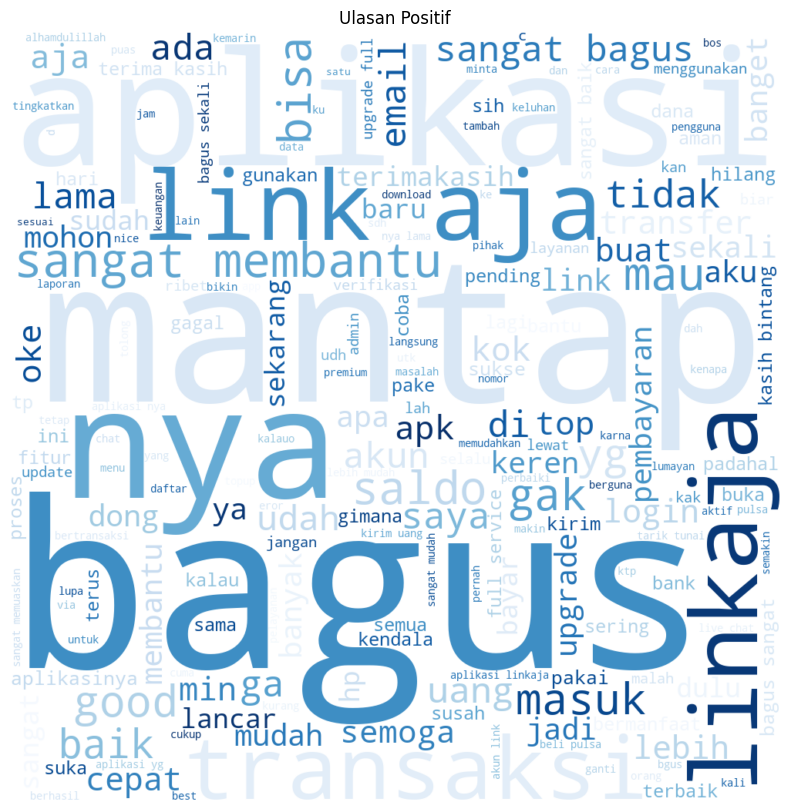

In [36]:
all_text_s1 = ' '.join(word for word in train_s1["content"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_26820\1924769717.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sentimen_data = pd.value_counts(df_link["label"], sort=True)


<function matplotlib.pyplot.show(close=None, block=None)>

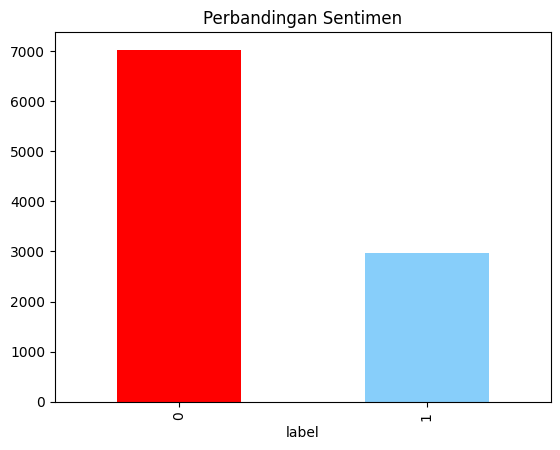

In [38]:
sentimen_data = pd.value_counts(df_link["label"], sort=True)
sentimen_data.plot(kind='bar', color=['red', 'lightskyblue'])
plt.title("Perbandingan Sentimen")
plt.show

In [39]:
result['content'] = result['content'].fillna("Tidak ada komentar")

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(result['content'], result['label'], 
                                                    test_size=0.1, stratify=result['label'], random_state=30)

In [41]:

import numpy as np

In [42]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [43]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(9000, 7327)
(1000, 7327)


In [44]:
X_train = X_train.toarray()

In [45]:

X_test = X_test.toarray()

In [46]:
#Machine Learning (Naive Bayes Classifier)
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [49]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=999)

params_NB = {'var_smoothing': np.logspace(0, -9, num=50)}
gscv_nb = GridSearchCV(estimator=nb,
                        param_grid=params_NB,
                        cv = cv_method,
                        verbose = 1, 
                        scoring = 'accuracy')

gscv_nb.fit(X_train, y_train)
gscv_nb.best_params_

Fitting 10 folds for each of 50 candidates, totalling 500 fits


{'var_smoothing': np.float64(1.0)}

In [50]:
nb = GaussianNB(var_smoothing=np.float64(1.0))

In [51]:
nb.fit(X_train, y_train)

,priors,None
,var_smoothing,np.float64(1.0)


In [52]:
y_pred_nb = nb.predict(X_test)

In [58]:
#Confusion Matrix
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    RocCurveDisplay
)


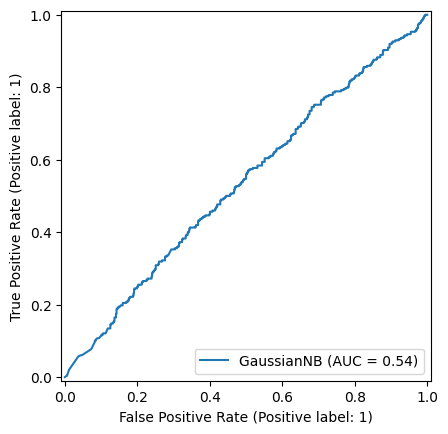

In [59]:
import matplotlib.pyplot as plt

# nb = model yang sudah kamu fit
RocCurveDisplay.from_estimator(nb, X_test, y_test)
plt.show()


In [60]:
print('----- confusion matrix ------')
print(confusion_matrix(y_test, y_pred_nb))

print('----- classification report -----')
print(classification_report(y_test, y_pred_nb))

----- confusion matrix ------
[[614  88]
 [258  40]]
----- classification report -----
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       702
           1       0.31      0.13      0.19       298

    accuracy                           0.65      1000
   macro avg       0.51      0.50      0.48      1000
weighted avg       0.59      0.65      0.60      1000

